# Classification of the anemia by conjunctiva

# Data loading

In [ ]:
import pickle

dataset = pickle.load(open('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/x_final_conjunctiva.pkl', 'rb'))
labels = pickle.load(open('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/y_final_conjunctiva.pkl', 'rb'))

In [ ]:
print(dataset.shape)
print(len(labels))

(4272, 64, 64, 3)
4272


# Data Split

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dataset,  labels, test_size=0.30, random_state=42)

# x_train=x_train/255
# x_test=x_test/255


# Model Network

# EfficientnetV2B2

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,Multiply, Flatten, Reshape,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

my_callbacks = [EarlyStopping(monitor='loss', patience=5)]

num_classes=2

# Load pre-trained EfficientNetB0 model without the classification head
base_model = EfficientNetV2B2(weights='imagenet', include_top=False, input_shape=(64,64, 3))

for layer in base_model.layers:
    layer.trainable = True

model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

# Defining the optimizer
optimizer = Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,epsilon=1e-07)

# Compile the model
model.compile(optimizer=optimizer,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Model training
history=model.fit(x=x_train,y=y_train, batch_size=32, epochs=50000, verbose="auto",validation_split=0.2,callbacks=my_callbacks)

#Saving model
#model.save("/content/drive/MyDrive/Classification of Anemia using palm and conjuntiva",save_format='efficientnet_model.h5') # not working with efficientnetB0

35839040/35839040 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-b2 (Function  (None, 2, 2, 1408)       8769374   
 al)                                                             
                                                                 
 global_average_pooling2d_10  (None, 1408)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_22 (Dense)            (None, 1024)              1442816   
                                                                 
 dense_23 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_24 (Dense)            (None, 2)                 2050      
                                                       

In [ ]:
model.save_weights('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/EfficientNet_Experiment_3/Model/efficientnetV2B2_model.h5', overwrite=True, save_format='h5', options=None)

In [ ]:
pickle.dump(history, open('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/EfficientNet_Experiment_3/Result/efficientnetV2B2_history.pkl', 'wb'))

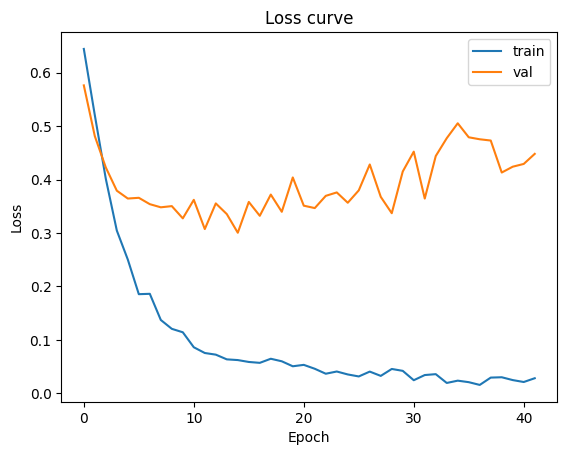

In [ ]:
import matplotlib.pyplot as plt
history = pickle.load(open('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/EfficientNet_Experiment_3/Result/efficientnetV2B2_history.pkl', 'rb'))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.savefig("/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/EfficientNet_Experiment_3/Result/V2B2_Loss_curve.png")
plt.show()


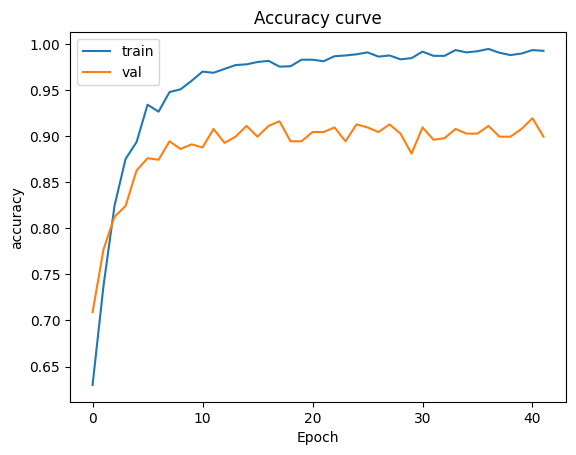

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy curve')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.savefig("/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/EfficientNet_Experiment_3/Result/V2B2_accuracy_curve.png")
plt.show()



In [ ]:
model.load_weights('/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/EfficientNet_Experiment_3/Model/efficientnetV2B2_model.h5', skip_mismatch=False, by_name=False, options=None)

## Prediction

In [ ]:
results = model.evaluate(x_test, y_test)
print("test loss, test acc:", results)

41/41 [==============================] - 11s 261ms/step - loss: 0.4632 - accuracy: 0.8924
test loss, test acc: [0.4632052183151245, 0.8923556804656982]


In [ ]:
prediction = model.predict(x_test)

41/41 [==============================] - 12s 226ms/step


## Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


predicted_classes = np.argmax(prediction, axis=1)

confusion_mat = confusion_matrix(y_test, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.savefig("/content/drive/MyDrive/Anemia-Detection-From-Conjunctiva/EfficientNet_Experiment_3/Result/V2B2_confusion_matrix.png") #save as png
plt.show()

NameError: ignored